In [1]:
# Import libraries for data manipulation and visualization
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Import libraries for preprocessing and machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [2]:

data = pd.read_csv('Tesla.csv')
data.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
data.shape


(1692, 7)

In [5]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [6]:
# Convert the Date column to datetime and sort by Date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')




In [7]:
# Extract Day, Month, and Year from the Date column
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

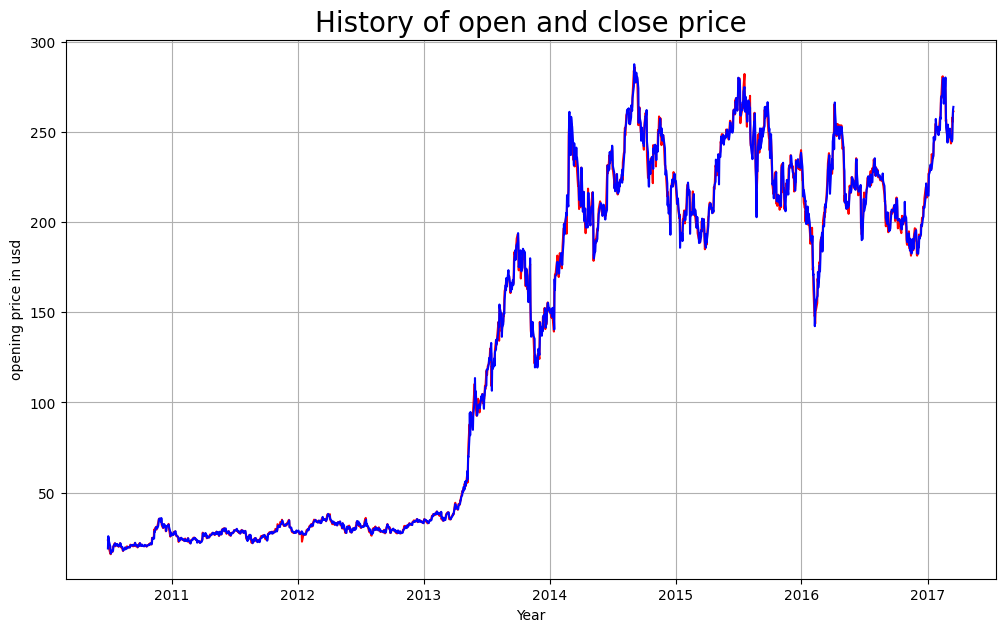

In [8]:
plt.figure(figsize=(12,7))
plt.title('History of open and close price',fontsize=20)
plt.plot(data['Date'],data['Close'], color='red')
plt.plot(data['Date'],data['Open'], color='blue')
plt.xlabel('Year', fontsize=10)
plt.ylabel('opening price in usd', fontsize = 10)
plt.grid(True)
plt.show()

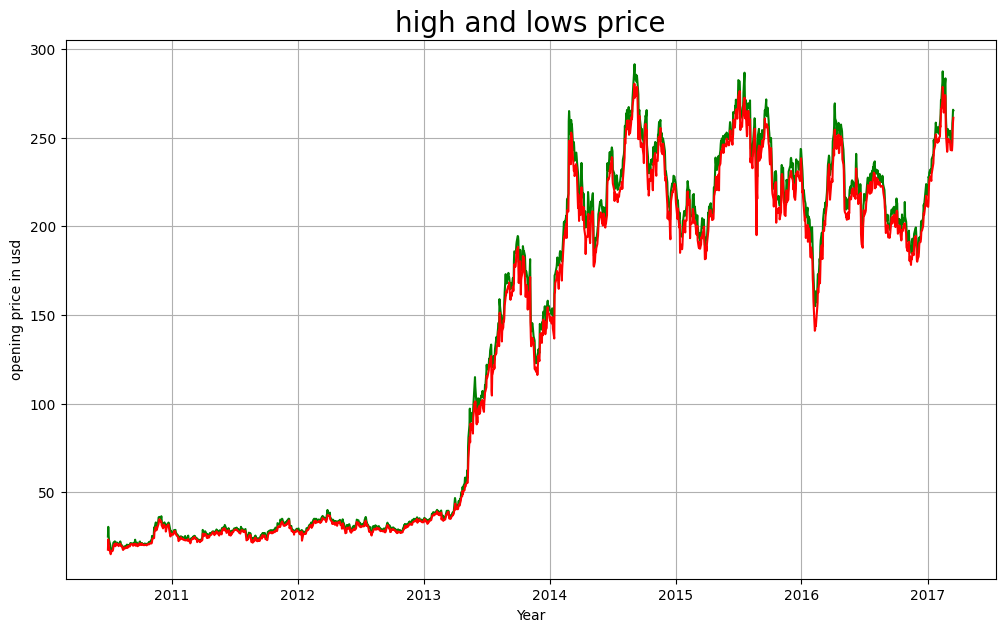

In [9]:
plt.figure(figsize=(12,7))
plt.title('high and lows price',fontsize=20)
plt.plot(data['Date'],data['High'], color='green')
plt.plot(data['Date'],data['Low'], color='red')
plt.xlabel('Year', fontsize=10)
plt.ylabel('opening price in usd', fontsize = 10)
plt.grid(True)
plt.show()

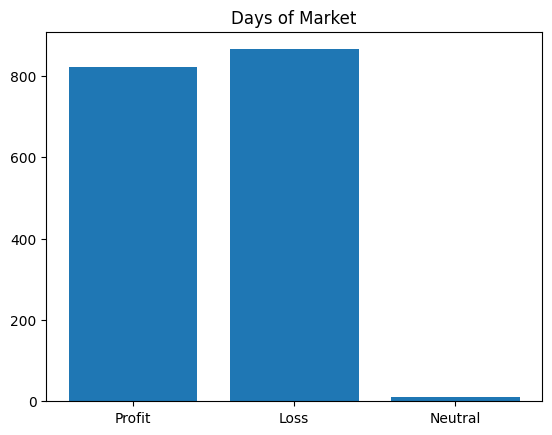

In [10]:
profit=data[data["Open"]<data['Close']].value_counts().sum()
loss=data[data["Open"]>data['Close']].value_counts().sum()
neutral=data[data["Open"]==data['Close']].count().value_counts().sum()

plt.title('Days of Market',fontsize='12')
x=np.array(['Profit','Loss','Neutral'])
y=np.array([profit,loss,neutral])
plt.bar(x,y)
plt.show()

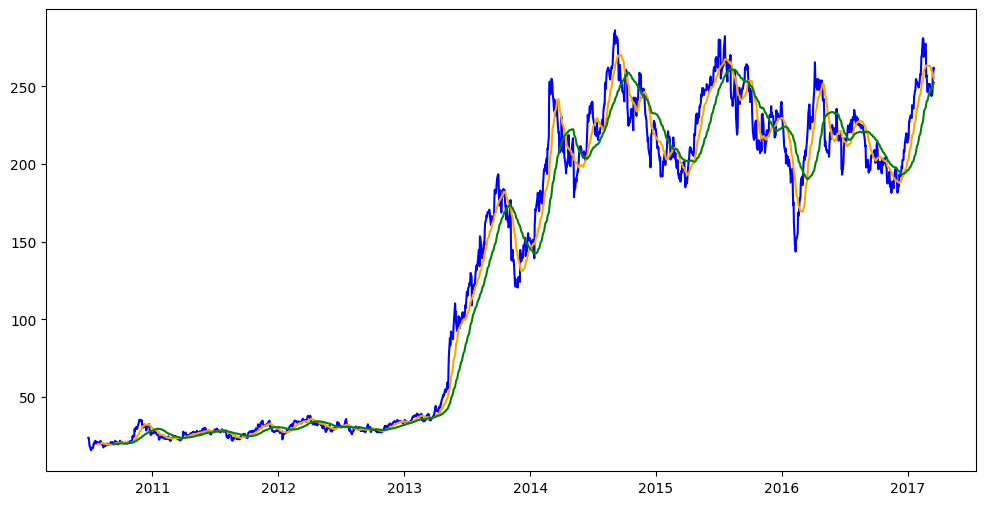

In [11]:
# Calculate moving averages to buy or sale stock
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot Close prices along with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA20'], label='20-Day MA', color='orange')
plt.plot(data['Date'], data['MA50'], label='50-Day MA', color='green')

In [12]:

# Identify buy and sell signals
data['Signal'] = 0
data['Signal'] = data['MA20'] > data['MA50']

buy_signals = data[(data['Signal'] == True) & (data['Signal'].shift(1) == False)]
sell_signals = data[(data['Signal'] == False) & (data['Signal'].shift(1) == True)]

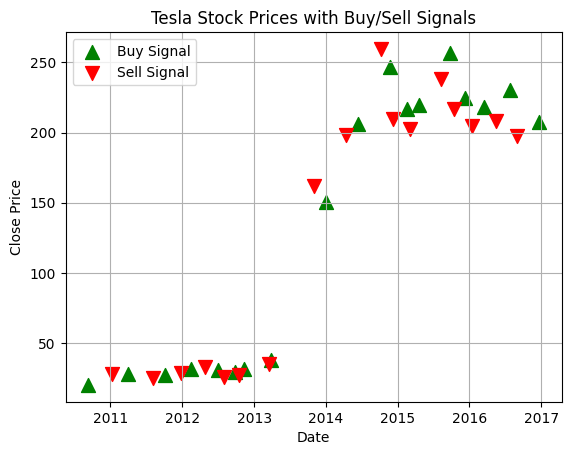

In [13]:

plt.scatter(buy_signals['Date'], buy_signals['Close'], label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Close'], label='Sell Signal', marker='v', color='red', s=100)

plt.title('Tesla Stock Prices with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

Preprocessing

In [14]:
data['Signal'] = 0
data.loc[(data['Close'] > data['Open']) & (data['Close'] >= data['High'] * 0.95), 'Signal'] = 1

In [15]:

# Add labels for Buy/Sell
data['Label'] = data['Signal'].astype(int)


scaler = MinMaxScaler()
# Include 'Day', 'Month', 'Year' along with other features for scaling
data[['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year']] = scaler.fit_transform(
    data[['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year']]
)

# Droping rows with NaN values(preprocessing)
data.dropna(inplace=True)


print(data.head())

         Date      Open      High       Low     Close    Volume  Adj Close  \
49 2010-09-08  0.016646  0.015721  0.021174  0.018872  0.004586  20.900000   
50 2010-09-09  0.017899  0.016085  0.021513  0.018169  0.006956  20.709999   
51 2010-09-10  0.016978  0.015648  0.018009  0.016171  0.007237  20.170000   
52 2010-09-13  0.017493  0.015539  0.020797  0.018206  0.006541  20.719999   
53 2010-09-14  0.016204  0.018087  0.020910  0.019686  0.014474  21.120001   

         Day     Month  Year     MA20     MA50  Signal  Label  
49  0.233333  0.727273   0.0  19.5220  19.8336       1      1  
50  0.266667  0.727273   0.0  19.6625  19.7700       0      0  
51  0.300000  0.727273   0.0  19.7910  19.6968       0      0  
52  0.400000  0.727273   0.0  19.9110  19.6720       0      0  
53  0.433333  0.727273   0.0  20.0280  19.7104       1      1  


Feature Selection

In [16]:
# Features and labels
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year']].values  # Include Day, Month, and Year
y = data['Label'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if class imbalance is causing problems
print(f"Class distribution in training data: {pd.Series(y_train).value_counts()}")

Class distribution in training data: 0    672
1    642
Name: count, dtype: int64


Random Forest

In [25]:

# Train 
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate 
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7203647416413373
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       177
           1       0.69      0.70      0.70       152

    accuracy                           0.72       329
   macro avg       0.72      0.72      0.72       329
weighted avg       0.72      0.72      0.72       329



KNN

In [26]:


# Train
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.48936170212765956
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       177
           1       0.45      0.50      0.47       152

    accuracy                           0.49       329
   macro avg       0.49      0.49      0.49       329
weighted avg       0.49      0.49      0.49       329



Decision Tree

In [29]:

# Train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7659574468085106
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       177
           1       0.75      0.75      0.75       152

    accuracy                           0.77       329
   macro avg       0.76      0.76      0.76       329
weighted avg       0.77      0.77      0.77       329



Logistic Regration

In [30]:

#train
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

#evaluate
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.6261398176291794
              precision    recall  f1-score   support

           0       0.62      0.76      0.69       177
           1       0.63      0.47      0.54       152

    accuracy                           0.63       329
   macro avg       0.63      0.61      0.61       329
weighted avg       0.63      0.63      0.62       329



In [31]:
# Handle new data (make sure it has the same structure as the training data)
# Include Volume with a placeholder value (e.g., mean Volume from the dataset)
volume_mean = data['Volume'].mean()
volume_mean

np.float64(0.11208519541819371)

In [ ]:
# New data with Date, Open, High, Low, Close, and Volume
new_data = pd.DataFrame(
    {
        'Open': [10.3],
        'High': [35.5],
        'Low': [11.9],
        'Close': [3.1],
        'Volume': [volume_mean],  # Use mean Volume as a placeholder
        'Day': [15],              # Example Day
        'Month': [5],             # Example Month
        'Year': [2024]            # Example Year
    }
)

# Ensure new_data has the correct structure and scale it using the trained scaler
scaled_new_data = scaler.transform(new_data)

# Predict using the RandomForest model
predicted_share = rf_model.predict(scaled_new_data)
print(f"Predicted Share Signal: {predicted_share}")


Predicted Share Signal: [1]


In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load data
data = pd.read_csv('Tesla.csv')

# Preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Extract features and labels
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year']] = scaler.fit_transform(
    data[['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year']]
)

# Labels (Buy/Sell/Neutral)
data['Signal'] = 0
data.loc[(data['Close'] > data['Open']) & (data['Close'] >= data['High'] * 0.95), 'Signal'] = 1

# Features and labels
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year']].values
y = data['Signal'].values

# Train model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X, y)

# Save the model and scaler
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
